In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredError
from sklearn.metrics import accuracy_score

TRAIN_DATA_PATH = 'FL_G_dataset-PTC_training.csv'
TEST_DATA_PATH = 'FL_G_dataset-PTC_test.csv'
TARGET_NAME = 'Diameter of Bulb(mm)'

# Load the data
train_data = pd.read_csv(TRAIN_DATA_PATH)
test_data = pd.read_csv(TEST_DATA_PATH)

x_train, y_train = train_data.drop(TARGET_NAME, axis=1), train_data[TARGET_NAME]
x_test, y_test = test_data.drop(TARGET_NAME, axis=1), test_data[TARGET_NAME]

# Normalize the target variable
scaler = StandardScaler()
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

def scale_datasets(x_train, x_test):
    standard_scaler = StandardScaler()
    x_train_scaled = pd.DataFrame(standard_scaler.fit_transform(x_train), columns=x_train.columns)
    x_test_scaled = pd.DataFrame(standard_scaler.transform(x_test), columns=x_test.columns)
    return x_train_scaled, x_test_scaled

x_train_scaled, x_test_scaled = scale_datasets(x_train, x_test)

hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.1

# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
    model = Sequential([
        Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
        Dropout(0.2),
        Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
        Dropout(0.2),
        Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
        Dense(1, kernel_initializer='normal', activation='linear')
    ])
    return model

# build the model
model = build_model_using_sequential()

# loss function
msle = MeanSquaredError()
model.compile(loss=msle, optimizer=Adam(learning_rate=learning_rate), metrics=[msle])

# train the model
history = model.fit(x_train_scaled.values,y_train_scaled,epochs=100, batch_size=32,validation_split=0.2)

Epoch 1/100
2/2 [==============================] - 1s 192ms/step - loss: 125473.4297 - mean_squared_error: 139951.0312 - val_loss: 24951.3320 - val_mean_squared_error: 24951.3320
Epoch 2/100
2/2 [==============================] - 0s 40ms/step - loss: 373785.7500 - mean_squared_error: 416241.0938 - val_loss: 14135.8477 - val_mean_squared_error: 14135.8477
Epoch 3/100
2/2 [==============================] - 0s 25ms/step - loss: 66711.0391 - mean_squared_error: 73620.8125 - val_loss: 410045.5625 - val_mean_squared_error: 410045.5625
Epoch 4/100
2/2 [==============================] - 0s 32ms/step - loss: 33413.2695 - mean_squared_error: 31666.5312 - val_loss: 3204.6733 - val_mean_squared_error: 3204.6733
Epoch 5/100
2/2 [==============================] - 0s 29ms/step - loss: 564.0281 - mean_squared_error: 518.9349 - val_loss: 169.4198 - val_mean_squared_error: 169.4198
Epoch 6/100
2/2 [==============================] - 0s 29ms/step - loss: 459.2368 - mean_squared_error: 465.4184 - val_loss:

Epoch 51/100
2/2 [==============================] - 0s 31ms/step - loss: 0.6558 - mean_squared_error: 0.6596 - val_loss: 0.9756 - val_mean_squared_error: 0.9756
Epoch 52/100
2/2 [==============================] - 0s 25ms/step - loss: 1.2275 - mean_squared_error: 1.1435 - val_loss: 1.6114 - val_mean_squared_error: 1.6114
Epoch 53/100
2/2 [==============================] - 0s 30ms/step - loss: 0.4832 - mean_squared_error: 0.4881 - val_loss: 2.0102 - val_mean_squared_error: 2.0102
Epoch 54/100
2/2 [==============================] - 0s 27ms/step - loss: 0.3587 - mean_squared_error: 0.3655 - val_loss: 1.1568 - val_mean_squared_error: 1.1568
Epoch 55/100
2/2 [==============================] - 0s 24ms/step - loss: 0.6976 - mean_squared_error: 0.6775 - val_loss: 0.3848 - val_mean_squared_error: 0.3848
Epoch 56/100
2/2 [==============================] - 0s 24ms/step - loss: 0.5447 - mean_squared_error: 0.5567 - val_loss: 0.3177 - val_mean_squared_error: 0.3177
Epoch 57/100
2/2 [================

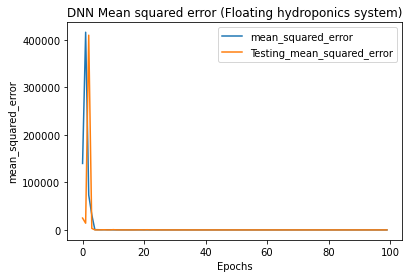

In [3]:
def plot_history(history, key):
    plt.plot(history.history[key])
    plt.plot(history.history['val_' + key])
    plt.title('DNN Mean squared error (Floating hydroponics system)')
    plt.xlabel("Epochs")
    plt.ylabel(key)
    plt.legend([key, 'Testing_' + key])
    plt.show()

# Plot the history
plot_history(history, 'mean_squared_error')